In [1]:
# load datatable
import pandas as pd
df_reg = pd.read_csv("/Users/saeko/Documents/MOCCS/important_chipseq_prediction/data/ignored_paper/df_reg_902TF_427var.tsv", sep="\t")
df_reg.head()

,pub_num,ChIP_num,var1,var2,var3,var4,var5,var6,var7,var8,...,var418,var419,var420,var421,var422,var423,var424,var425,var426,var427
0,0.293372,-0.212042,-1.221343,1.335732,1.266304,1.451134,-1.081191,-0.620464,1.128741,1.304912,...,1.104406,1.011349,1.212536,1.238126,1.125150,1.212249,1.125947,0.900949,0.714594,0.361582
1,1.946927,-0.169678,-0.404102,-0.119716,0.966966,-0.772425,1.338718,-0.620444,1.116724,0.906000,...,0.665871,0.981769,0.933349,0.974418,0.977015,0.952512,0.855586,0.900949,0.714594,1.538638
2,3.980902,12.172549,0.118663,0.489127,0.806041,1.666712,-1.315808,-0.620462,0.301282,0.058831,...,-0.434575,-0.290427,-1.584552,-1.615123,-0.463752,-1.561771,-1.595916,-0.740499,-0.274564,-0.147543
3,0.051594,0.451670,-0.524076,0.748819,1.327742,1.620883,-1.265931,-0.620464,0.060395,0.297519,...,0.650365,0.634577,0.732693,0.740827,0.674407,0.798427,0.725416,0.844347,0.714594,0.316687
4,0.065120,-0.197921,0.787040,1.178473,0.799100,1.646693,-1.294023,-0.620460,-0.075304,-0.174818,...,0.789717,0.868330,0.752055,0.690146,0.748773,0.650112,0.818241,0.617940,0.714594,-0.175999


In [2]:
# 自分でxboostをやってみる (trainは90%のgene, testは10%のgene)
# 参考：https://htomblog.com/python-xgboost

#print(df_reg.head())

# データ分割
from sklearn.model_selection import train_test_split

#df_reg_chip = df_reg.drop(columns = ["pub_num"])
df_reg_chip = df_reg
print(df_reg_chip.head())
print(df_reg_chip.shape)

#train, test = train_test_split(df_reg_chip, test_size = 0.1) #90%はtrain,10%がtest
train, test = train_test_split(df_reg_chip, test_size = 0.3) #70%はtrain,30%がtest
print(train.shape, test.shape)
print(train.head(), test.head())

    pub_num   ChIP_num      var1      var2      var3      var4      var5  \
0  0.293372  -0.212042 -1.221343  1.335732  1.266304  1.451134 -1.081191   
1  1.946927  -0.169678 -0.404102 -0.119716  0.966966 -0.772425  1.338718   
2  3.980902  12.172549  0.118663  0.489127  0.806041  1.666712 -1.315808   
3  0.051594   0.451670 -0.524076  0.748819  1.327742  1.620883 -1.265931   
4  0.065120  -0.197921  0.787040  1.178473  0.799100  1.646693 -1.294023   

       var6      var7      var8  ...    var418    var419    var420    var421  \
0 -0.620464  1.128741  1.304912  ...  1.104406  1.011349  1.212536  1.238126   
1 -0.620444  1.116724  0.906000  ...  0.665871  0.981769  0.933349  0.974418   
2 -0.620462  0.301282  0.058831  ... -0.434575 -0.290427 -1.584552 -1.615123   
3 -0.620464  0.060395  0.297519  ...  0.650365  0.634577  0.732693  0.740827   
4 -0.620460 -0.075304 -0.174818  ...  0.789717  0.868330  0.752055  0.690146   

     var422    var423    var424    var425    var426    var427 

In [3]:
features = [c for c in df_reg_chip.columns if c != "ChIP_num"]
#print(features)

#学習用データ
X_train = train[features]
y_train = train["ChIP_num"].values

#検証用データ
X_test = test[features]
y_test = test["ChIP_num"].values

print(X_train, y_train)
print(X_train.shape, y_train.shape)

print(X_test, y_test)
print(X_test.shape, y_test.shape)

      pub_num      var1      var2      var3      var4      var5      var6  \
546 -0.049851 -0.216962  3.504613  2.709278  1.679279 -1.329484 -0.620464   
455  0.425250 -1.041404  3.228333  2.769473  1.679279 -1.329484 -0.620464   
801 -0.337279  0.291128  0.258332  0.312296 -0.174461  0.684443 -0.616080   
662 -0.367712 -0.117204 -0.184145  1.545016  1.678612 -1.328757 -0.620464   
854 -0.345733 -0.165714 -0.255705  0.217516  1.489425 -1.124095 -0.618930   
..        ...       ...       ...       ...       ...       ...       ...   
687 -0.332207 -0.445256  2.348677  1.253668  1.674001 -1.323739 -0.620464   
691 -0.394764  0.121422  0.760739  0.096184 -0.501223  1.028253 -0.601369   
400 -0.266267 -0.607029 -0.320852  0.193681  0.102971  0.379201 -0.611956   
401  0.944311 -0.252758  1.370083  1.159343  1.653614 -1.301552 -0.620464   
710 -0.252741 -0.524279  1.653809  0.234392 -0.789615  1.350576 -0.611912   

         var7      var8      var9  ...    var418    var419    var420  \
546

In [4]:
# model 作成
#!pip install xgboost
import xgboost as xgb
print(xgb.__version__)

# データ形式の変換
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

# パラメータ設定
# regression: 回帰, squarederror: 二乗誤差
params = {"objective": "reg:squarederror",'eval_metric': 'rmse','booster': 'gbtree', 'seed': 2525}

#学習過程を取得するための変数を用意
evals_result = {}
model = xgb.train(#上で設定した学習パラメータを使用
                params=params,
                dtrain=dtrain,
                #学習のラウンド数
                num_boost_round=100000,
                #early stoppinguのラウンド数
                early_stopping_rounds=15,
                #検証用データ
                evals=[(dtrain, 'train'), (dtest, 'eval')],
                #上で用意した変数を設定
                evals_result=evals_result)

# 学習
#model = xgb.train(
#    params = params,
#    dtrain = dtrain,
#    evals = [(dtrain, "train"), (dtest, "test")],
#)

2.0.0
[0]	train-rmse:0.72663	eval-rmse:1.26139
[1]	train-rmse:0.61310	eval-rmse:1.25940
[2]	train-rmse:0.52092	eval-rmse:1.25757
[3]	train-rmse:0.44556	eval-rmse:1.25347
[4]	train-rmse:0.38065	eval-rmse:1.25547
[5]	train-rmse:0.32806	eval-rmse:1.25377
[6]	train-rmse:0.28115	eval-rmse:1.25496
[7]	train-rmse:0.24490	eval-rmse:1.25510
[8]	train-rmse:0.21274	eval-rmse:1.25485
[9]	train-rmse:0.18775	eval-rmse:1.25348
[10]	train-rmse:0.16370	eval-rmse:1.25542
[11]	train-rmse:0.14346	eval-rmse:1.25614
[12]	train-rmse:0.12872	eval-rmse:1.25633
[13]	train-rmse:0.11516	eval-rmse:1.25706
[14]	train-rmse:0.10058	eval-rmse:1.25681
[15]	train-rmse:0.09080	eval-rmse:1.25670
[16]	train-rmse:0.08261	eval-rmse:1.25742
[17]	train-rmse:0.07467	eval-rmse:1.25798


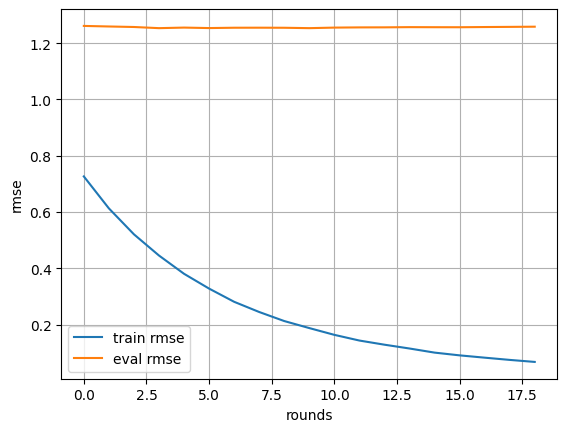

In [5]:
# 学習過程のグラフ表示
import matplotlib.pyplot as plt

#trainデータに対してのloss推移をplot
plt.plot(evals_result['train']['rmse'], label='train rmse')
#testデータに対してのloss推移をplot
plt.plot(evals_result['eval']['rmse'], label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.savefig("img.png", bbox_inches='tight')
plt.show()

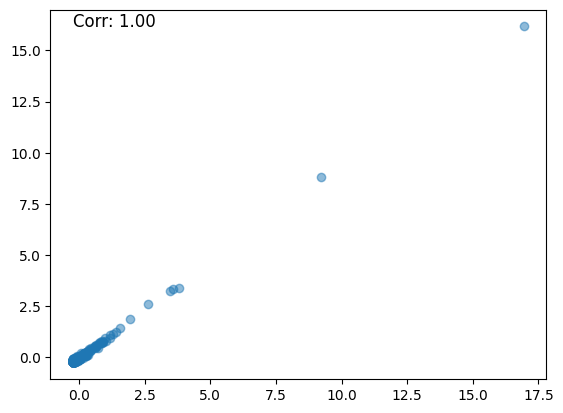

In [6]:
# 予測結果
import matplotlib.pyplot as plt
import numpy as np

preds = model.predict(dtrain)
corr = np.corrcoef(y_train, preds)[0, 1]
plt.scatter(y_train, preds, alpha = 0.5)
#plt.plot(np.arange(0, 1), np.arange(0, 1), "r-")
plt.plot()
plt.text(np.min(y_train), np.max(preds), f'Corr: {corr:.2f}', fontsize=12)
plt.show() 

In [10]:
scatter_df = pd.DataFrame({"y_train": y_train, "preds": preds})
scatter_df.to_csv("/Users/saeko/Unmeasured/data/xgboost/scatter_df.tsv", sep="\t", index=False)

     Feature  Importance
0    pub_num        55.0
125   var251        19.0
2       var2        13.0
12     var13        12.0
3       var3        10.0
..       ...         ...
39     var64         1.0
86    var138         1.0
85    var136         1.0
83    var131         1.0
106   var214         1.0

[159 rows x 2 columns]


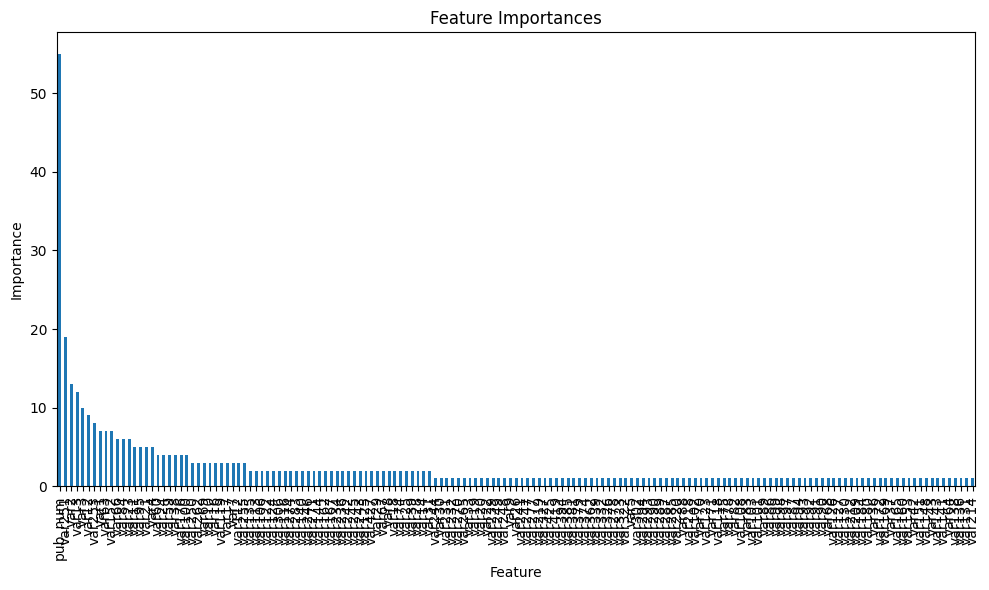

In [7]:
# 特徴量の重要度を取得
importance = model.get_score(importance_type='weight')
features_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
})

# 重要度でソート
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)
features_df.to_csv("/Users/saeko/Unmeasured/data/xgboost/feature_importances.csv", index=False)

# さらにグラフで表示する場合
features_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6), legend=False)
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
